In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier,  VotingClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings

## LOAD AND EXPLORE DATASET

In [2]:
heart = pd.read_csv('heart.csv')
heart.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [3]:
heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


## Columns description
1. age : Age of patients in years
2. sex : Male/Female
3. cp : Chest pain type
4. trestbps : resting blood pressure in mmHg on admission to the hospital
5. chol : serum cholesterol in mg/dl
6. fbs : if fasting blood sugar > 120mg/dl
7. restecg : resting electrocardiographic results
8. thalach : maximum heart rate achived
9. exang : exercise-induced angina (True/False)
10. oldpeak :ST depression indues by exercise relative to rest
11. slope : the slope of the peak exercise ST segment
12. ca : number of major vessels (1-3) colored by flouroscopy
14. thal : normal, fixed defect, reversable defect
15. target : 0 = no heart disease, 1 = heart disease

In [4]:
heart.shape

(1025, 14)

In [5]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
heart.isnull().sum() #check for missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Text(0.5, 0.98, 'Little Visualization of the dataset')

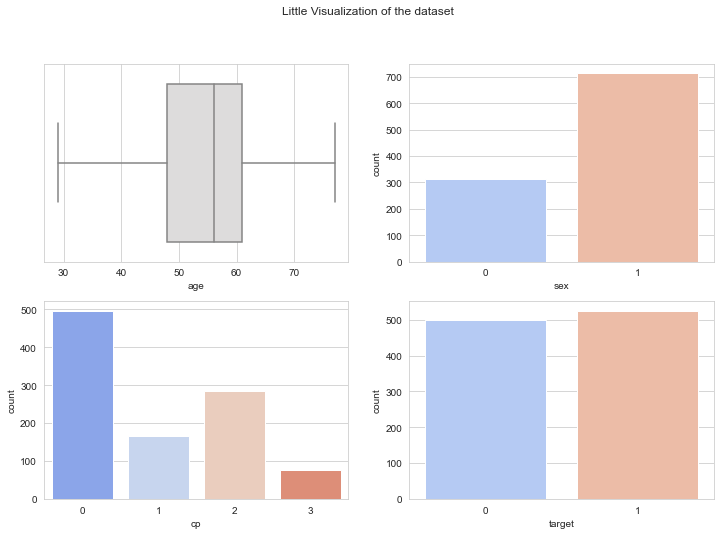

In [10]:
# plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
fig, axs = plt.subplots(2,2, figsize = (12,8))
sns.boxplot(ax = axs[0,0], x='age', palette='coolwarm', data=heart)
sns.countplot(ax = axs[0,1], x='sex', palette='coolwarm', data=heart)
sns.countplot(ax = axs[1,0], x='cp', palette='coolwarm', data=heart)
sns.countplot(ax = axs[1,1], x='target', palette='coolwarm', data=heart)
# for pos in ['right', 'top', 'bottom', 'left']:
#     plt.gca().spines[pos].set_visible(False)
fig.suptitle('Little Visualization of the dataset')

In [11]:
heart.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


Text(0.5, 1.0, 'Correlation among the variables')

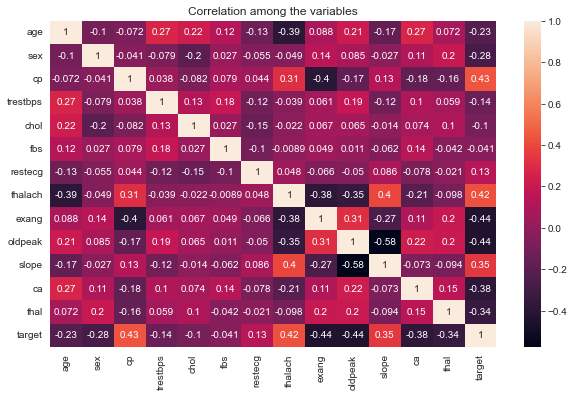

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(heart.corr(), annot=True).set_title('Correlation among the variables')

Text(0.5, 1.0, 'Cholesterol level variation with age')

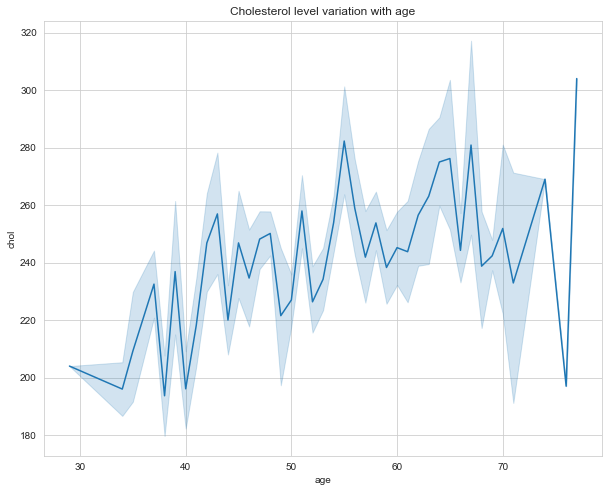

In [13]:
plt.figure(figsize=(10,8))
sns.lineplot(x='age', y='chol', palette='coolwarm', data=heart).set_title('Cholesterol level variation with age')

# MODEL
The model should be able to predict those that have heart disease with great precission

## DEFINING MY FEATURE AND TARGET

In [14]:
# MY FEATURE
X = heart.drop(columns=['target'], axis=1).values
X

array([[52.,  1.,  0., ...,  2.,  2.,  3.],
       [53.,  1.,  0., ...,  0.,  0.,  3.],
       [70.,  1.,  0., ...,  0.,  0.,  3.],
       ...,
       [47.,  1.,  0., ...,  1.,  1.,  2.],
       [50.,  0.,  0., ...,  2.,  0.,  2.],
       [54.,  1.,  0., ...,  1.,  1.,  3.]])

In [15]:
# MY TARGET
y = heart[['target']].values
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]], dtype=int64)

## SPLIT DATASET FOR TRAINING AND TESTING

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

### Finding the optimal hyperparameters to get best precision for the selected models

In [17]:
models_list = [KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier()]

In [18]:
model_hyperparameters = {
    
    'KNN_hyp' : {
        'n_neighbors' : [2,3,5,]
    },
    'dec_tree_hyp' : {
        'max_depth' : [6,8,10,12],
    },
#     'svc_hyp' : {
#         'C' : [5,10,20,50,100],
#         'gamma': [0.10, 1.00,10.00,20.00]
#     }
#     ,
    'random_forest_hyp' : {
        'n_estimators' : [10,40,100, 150],
        'max_features' : [2,4]
    }
}

In [19]:
model_keys= list(model_hyperparameters.keys())
print(model_keys)

['KNN_hyp', 'dec_tree_hyp', 'random_forest_hyp']


In [20]:
def model_selection(list_of_models,hyperparametrs_dictionary):
    
    result = []
    i = 0
    
    for model in list_of_models:
        key = model_keys[i]
        params = hyperparametrs_dictionary[key]
        i+=1
        
        print(model)
        print(params)
        print('---------------------------------------------')
        
        classifier = GridSearchCV(model, params, cv=5, scoring='precision')
        
        # fitting the data to classifier
        
        classifier.fit(X,y.ravel())
        result.append({
            'model used': model,
            'highest score' : classifier.best_score_,
            'best hyperparameters': classifier.best_params_
        })
        
    result_dataframe = pd.DataFrame(result, columns=['model used', 'highest score', 'best hyperparameters'])

    return result_dataframe

In [37]:
model_selection(models_list, model_hyperparameters)

KNeighborsClassifier()
{'n_neighbors': [2, 3, 5]}
---------------------------------------------
DecisionTreeClassifier()
{'max_depth': [6, 8, 10, 12]}
---------------------------------------------
RandomForestClassifier()
{'n_estimators': [10, 40, 100, 150], 'max_features': [2, 4]}
---------------------------------------------


,model used,highest score,best hyperparameters
0,KNeighborsClassifier(),0.993814,{'n_neighbors': 2}
1,DecisionTreeClassifier(),1.000000,{'max_depth': 10}
2,RandomForestClassifier(),0.994495,"{'max_features': 2, 'n_estimators': 40}"


## USING DECISION TREE ALGORITHM

In [21]:
dtc = DecisionTreeClassifier(max_depth = 10, random_state=45).fit(X_train, y_train)

In [22]:
dtc_pred = dtc.predict(X_test)

## TESTING THE ACCURACT OF THE DTC MODEL

In [23]:
# USING CONFUSION MATRIX
print(confusion_matrix(y_test,dtc_pred))

[[145   0]
 [  0 163]]


In [24]:
# USING CLASSIFICATION REPORT
print(classification_report(y_test,dtc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       1.00      1.00      1.00       163

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



In [25]:
dtc_pred_tr = dtc.predict(X_train)

In [26]:
# USING CONFUSION MATRIX
print(confusion_matrix(y_train,dtc_pred_tr))

[[354   0]
 [  0 363]]
